In [17]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization  
$
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\LN}[1]{\ln\left\{#1\right\}} 
\newcommand{\P}{\mathbb{P}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\fracone}[1]{\frac{1}{#1}}
\newcommand{\half}{\fracone{2}}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
\newcommand{\partdiff}[2]{\frac{\partial #1}{\partial #2}}
$

$\newcommand{\mat}[1]{
\left[
\begin{matrix}
#1
\end{matrix}
\right]
}
$

$\newcommand{\arrthree}[1]{
\begin{array}{rlr}
#1
\end{array}
}
$

$
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
$

$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$



sum, product
$
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet bold,
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
\newcommand{\ab}{\mathbf{a}}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\Abt}{\Ab^T}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\Yb}{\mathbf{Y}}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
\newcommand{\Ub}{\mathbf{U}}
$

math bold
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\phib}{\pmb{\phi}}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phit}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
$

questions
* what is #p complexity class?

Outline
========

how to fit nonlinear functions using bases functions and how to control model complexity
* how to derive **ridge regression**
* trade-off of fitting the data and **regularizing** it
* learning **polynomial regression**
* if basis functions are given, the pmtr learning is still linear
* **cross-validation**
* effects of data size and number of basis functions on **generalization**

Regularization
===============

all the answers so far are of the form
$$
\hat{\thetab} = \left( \Xt \Xb \right)^{-1} \Xt \yb
$$
* this requires the inversion of $\Xt \Xb$
* can be problematic if the system of equations is poorly conditioned.
* solution: add a small element to the diagonal:
  $$
    \hat{\thetab} = \left( \Xt \Xb + \delta^2 \mathcal{I} \right)^{-1} \Xt \yb
  $$
  
* this is ridge regression estimate
* it is the solution to the following regularized quadratic cost function
$$
J(\thetab) = (\yb - \Xb \thetab)^T (\yb - \Xb \thetab) + \underbrace{\delta^2 \thetat \thetab}_{
\begin{matrix}
  \text{penalty} \\ \text{regularizer}
\end{matrix}
}
$$

Derivation
----------

$$
\arrthree{
J(\thetab) &=
(\yb - \Xb \thetab)^T (\yb - \Xb \thetab) + \delta^2 \thetat \thetab
\\
\partdiff{J(\thetab)}{\thetab} &=
-2\Xt y + 2 \Xt \Xb \thetab + 2 \delta^2 \mathcal{I} \thetab
\\
& \text{equating this to zero, we get}
\\
\left(
  \Xt \Xb + \delta^2 \mathcal{I}
\right) \thetab
&=
\Xt \yb
}
$$

how do we find $\delta^2?$  
hmm, you need to have patience

RR as constrained optimization
------------------------------

$$
J(\thetab) = (\yb - \Xb \thetab)^T (\yb - \Xb \thetab) + \delta^2 \thetat \thetab
$$

$$
\min_{\thetab : \thetat \thetab \le t(\delta)}
\left\{
  (\yb - \Xb \thetab)^T (\yb - \Xb \thetab)
\right\}
$$




in 2D, $\thetab = \mat{\theta_1 & \theta_2}$  
And
$\thetat \thetab = \theta_1^2 + \theta_2^2$

so we got two sets of systems of concentric ellipses.
* the first system
  * has $\hat{\thetab}_{ML}$ at its center
  * this center corresponds to the solution when $\delta^2 = 0$
* second system
  * origin at center, which corresponds $\hat{\thetab}_R$
  * corresponds to the solution when $\delta^2 \rightarrow 
  \infty$

* the solution pt will lie at the intersection of these ellipses
* such a point will be the pt where the curves meet tangentially
* hence, the gradients, which are $\perp$ to the curves individually and hence are collinear.

* say we are not in the tangential meeting point
* we would have reached that point, by say, travelling from the tangential meeting point, along, say, the red curve
* by doing so, the cost of the first term doesn't change but that of the second term increases, since this corresponds to shifting to a curve of higher "radius".
* similar argument applies if we the roles of the first and the second terms are interchanged. 

* by proceeding this way, we can say that the set of all solutions corresponds to the set of all points which are tangential to all the points which are the tangential meeting points of the two systems of ellipses
* this curve, of finite length, connects the points $\hat{\thetab}_{ML}$ and $\hat{\thetab}_{R}$

* some thetas will go to zero faster than others
* useful in models where a suitable choice of regularizer will automatically drive most of the thetas to zero,
* higher the value of $\delta$, more $\theta_i$'s will be driven to zero
* refer to table 1.2 [11] of prml to see the effect of the value of the regularizer on the values of the weights in case of regularized polynomial regression.
* we will end up with a few thetas which are "responsible", establishing either correlation or if you will, causation
*  this is akin to feature selection.


Regularization paths
---------------------

as $\delta$ increases, $t(\delta)$ decreases and each $\thetab_i$ goes to zero.

Going nonlinear via basis functions
===================================

we introduce basis functions $\phi(.)$ to deal with nonlinearity.
$$
y(\xb) = \phib(\xb) \thetab + \epsilon
$$

for example, $\phib(x) = \left[ 1,x,x^2 \right]$

the solution in case of identity basis function, for reference, is
$$
\hat{\thetab}_{ML} = 
\left[ \Xt \Xb \right]^{-1} \Xt \yb
$$

the corresponding solution in case of basis function $\phi$ would become
$$
\hat{\thetab}_{\text{ML}} = 
\left[ \Phi^T \Phi \right]^{-1} \Phi^T \yb
$$

$\phib(\xb) = \left[ 1,x_1,x_2 \right]$

$\phib(\xb) = \left[ 1,x_1,x_2, x_1^2, x_2^2 \right]$
This would require the cross-term $x_1 ~x_2$.
In case of cubic basis function, we require 6 terms, along with terms corresponding to second order and first order.

the general formula is 
$$
\arrthree{
\text{#terms} &= 
1 + \sumiD \frac{i(i+1)}{2}
\\ &=
1 + \half \left[
\sumiD i^2 + i
\right]
\\ &=
1 + \half \left[
  \frac{D(D+1)(2D+1)}{6} + 
  \frac{D(D+1)}{2}
\right]
\\ &=
1 + \frac{D(D+1)}{2} \left[
 \frac{2D+1}{6} + \half
\right]
\\ &=
1 + \frac{D(D+1)(D+2)}{6}
}
$$

Thus the number of terms increase cubically with the order of the basis function. so please fucking avoid it if possible or if a lower order would suffice.

Example
--------
Ridge regression with a polynomial of degree 14
$$
\hat{y}(x_i) = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + \cdots + \theta_14 x_i^14 = \displaystyle \sum_{j=1}^{14} \theta_j x_i^j
\\
\phib = \mat{1 & x_i & x_i^2 & \cdots & x_i^{14} }
\\
J(\thetab) = (\yb - \Xb \thetab)^T (\yb - \Xb \thetab) + \delta^2 \thetat \thetab
$$


* increasing the order of the basis, by adding, say $X_i^{15}$ and so on would make the polynomial more squiggly.
* the question of how many powers of x to add is replaced by the value of $\delta^2$
* there are three cases to consider
  * small $\delta$: the regularizer has no effect and we are back to being squiggly
  * medium $\delta$: the regularizer does its job well, achieving what it was summoned for (from the deep dark abyssal parts of the universe)
  * large $\delta$: the regularizer does its job too well, that it is interfering with the job of the first aka primary term. this results in most of the terms going to zero. we are left with a curve with no bumps and shit and it becomes more featureless and tends to become a line. what a sad life it has. much more than the starving children of somalia. oh, hi mark.

lasso is more aggressive, drive more $\theta_i$'s to go to zero

Kernel regression and RBF's
---------------------------

we can use kernel or radial basis functions (RBFs) as features:
$$
\phib(\xb) = 
\mat{
  \kappa(\xb, \mub_1, \lambda)
  & \cdots
  & \kappa(\xb, \mub_d, \lambda)
}
$$

for instance, we can use
$$
\kappa(\xb, \mub_i, \lambda) = 
\EXP{-\half \Norm{\xb - \mu_i}^2}
$$

Now
$$
\hat{y}(\xb_i) = 
\sum_{d=0}^{D} \thetab_d \kappa(\xb_i, \mu_d, \lambda)
$$

In [20]:


a=[1,2,3]
b=[100,200,300]
print([x[0]*x[1] for x in zip(a,b)])
print(ft.reduce(lambda x,y: x+y, [x[0]*x[1] for x in zip(a,b)]))

[100, 400, 900]
1400


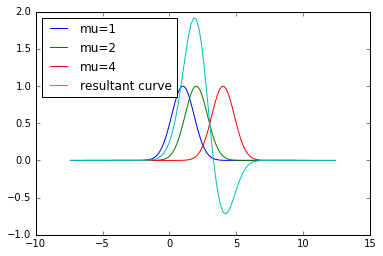

In [29]:
def val_rbf(x, mu, sigma):
    exponent = (x-mu)**2/sigma
    return math.exp(-exponent)

def plot_rbf(mu, sigma):
    x = np.linspace(mu-6*sigma, mu+6*sigma, 100)
    y = [val_rbf(xx, mu, sigma) for xx in x]
    plt.plot(x, y, label='mu={0}'.format(mu))

def vals_rbfs(x, thetas, mus, sigma):
    vals_rbf = [val_rbf(x, mu, sigma) for mu in mus]
    vals = [ theta*val for theta, val in zip(thetas, vals_rbf)]
    return ft.reduce(lambda x,y: x+y, vals)
    
def fiddler(sigma=.6, theta1=.3, theta2=1.8, theta3=-.8):
    mus = [1,2,4]
    thetas = [theta1, theta2, theta3]
    [plot_rbf(mu, sigma) for mu in mus]
    
    x_min = min(mus) - 6*sigma
    x_max = max(mus) + 6*sigma
    x = np.linspace(x_min, x_max, 100)
    y = [vals_rbfs(xx, thetas, mus, sigma) for xx in x]
    
    plt.plot(x, y, label='resultant curve')
    plt.legend(loc='upper left')
    plt.show()

interact(fiddler, sigma=(0,3,0.2), 
         theta1=(-2,2,.1),
         theta2=(-2,2,.1),
         theta3=(-2,2,.1)
        )
    


* think of basis functions as bricks
* give the right bricks, i can build the empire state building, hell, even the earth
* "give me a fulcrum and a place to stand and i shall move the earth"

$\hat{y}$ will be a weighted combination of gaussians.

a complete spec of the problem would be to specify $\lambda, ~\left\{\mu_i\right\}_{i=1}^{D}$

interruption @ end of lecture 4

$$
\phib(\xb_i) = 
\mat{
1 &
\kappa(\xb_i, \mu_1, \lambda) &
\kappa(\xb_i, \mu_2, \lambda) &
\kappa(\xb_i, \mu_3, \lambda) &
}
$$

* $\phib(\xb_i)$ is a vector with 4 entries
  * there are 3 bases
* the corresponding vector of parameters is $\underl{\thetab} = \mat{\theta_0 & \theta_1 & \theta_2 & \theta_3}^T$

$$
\hat{\yb}_i = \phib(\xb_i) \underl{\thetab}
$$

for a data set of size N, let
$$
\Yb = \mat{y_1 \\ y_2 \\ \vdots \\ y_N}
~~~ ~~~
\Phib = \mat{
\phi(\xb_1) \\ \phi(\xb_2) \\ \vdots \\ \phi(\xb_N)
}
$$

Then
$$
\arrthree{
\hat{\Yb} &= \Phib \thetab \\
\hat{\thetab}_{LS} &=
\left( \Phit \Phib \right)^{-1} \Phit \yb
\\
\hat{\thetab}_{\text{ridge}} &=
\left( \Phit \Phib + \delta^2 \mathcal{I} \right)^{-1} \Phit \yb
}
$$

this is still linear regression with $\Xb$ replaced by $\Phib$

* we can choose the locations $\mub$ of the basis functions to be the inputs.
* that is, $\mub_i = \xb_i$
* these basis functions are known as **kernels**
* the choice of width $\lambda$ is tricky

In [41]:
def fiddler_yo()
    x = np.linspace(x_min, x_max, 100)
    y = [vals_rbfs(xx, thetas, mus, sigma) for xx in x]
    
    plt.plot(x, y, label='resultant curve')
    plt.legend(loc='upper left')
    plt.show()

# interact(fiddler_yo, sigma=(0,3,0.2), )
    

# x_gt = np.linspace(-10,10,11)
# y_gt = [2,1,1,0,0,2,6,5,7,10,8]
# plt.plot(x_gt, y_gt, '.b')

# plt.show()

SyntaxError: invalid syntax (<ipython-input-41-6e2a0ecfd857>, line 1)

THe big fucking question  
* how do we choose,
  * regularization coefficient
  * width of the kernels
  * polynomial order

solution 1: cross-validation
-----------------------------

1. given training data $\left\{ \xb_i, y_i \right\}_{i=1}^{N}$ and some $\delta^2$ guess, compute $\hat{\thetab}$
1. $\hat{\Yb}_{\text{train}} = \Xb_{\text{train}} \hat{\thetab}$
1. $\hat{\Yb}_{\text{test}}  = \Xb_{\text{test}}  \hat{\thetab}$

all research/modelling is based on induction. this is coz learning is an ill posed problem and there could be infinitely many solutions to the same problem. we have to iteratively fit a better model based on new data.

* there are two strategies to pick the right parameter values, given the training and testing errors.
* first one is to find the max of the training and testing errors for each parameter value and take the parameter corresponding to the min of this.
* the second one is to avg the train and test errors and pick the parameter value which results in the min error.

k-fold cross-validation
---------------------------

* split the training data into K folds
* for each fold $k \in \left\{ 1, \cdots, K \right\}$
  * train on all folds but $k^{th}$
  * test on the $k^{th}$
* it is common to use K=5, called 5-fold CV
* if K=N, we get leave-one out cross-validation or LOOCV

Example: RR with polynomial of degree 14
----------------------------------------

Effect of data when we have the right model
-------------------------------------------

$$
y_i = \theta_0 + x_i \theta_1 + x_i^2 \theta_2 + \mathcal{N}(0, \sigma^2)
$$

the model that we have
$$
\hat{y}_i = \hat{\theta}_0 + x_i \hat{\theta}_1 + x_i^2 \hat{\theta}_2
$$

Effect of data when the model is too simple
-------------------------------------------

$$
y_i = \theta_0 + x_i \theta_1 + x_i^2 \theta_2 + \mathcal{N}(0, \sigma^2)
$$

the model that we have
$$
\hat{y}_i = \hat{\theta}_0 + x_i \hat{\theta}_1
$$

Effect of data when the model is very complex
-------------------------------------------

$$
y_i = \theta_0 + x_i \theta_1 + x_i^2 \theta_2 + \mathcal{N}(0, \sigma^2)
$$

the model that we have
$$
\hat{y}_i = \hat{\theta}_0 + x_i \hat{\theta}_1 + x_i^2 \hat{\theta}_2
$$

The plot of test vs train errors as the size of the data set increases  
* the test error, drops from above and tends to converge
  * like $e^{-x}$
* the train error, increases from below and tends to converge
  * like log
  
this plot is similar to the plot in "learning from data" by mostafa
* fig 2.3 [59]
* section 2.3.2 [66]

More data improves the results, but only if the model has the right complexity

Confidence in the predictions
-----------------------------



what we essentially try to do is to reduce the uncertainty all over the data space.  
but the right thing to do is to reduce the uncertainty in regions where we have observed some data and be more uncertain in the regions where we haven't observed anything